# Laptop Price Prediction


In [ ]:
# Importing pandas Library
import pandas as pd


# Reading and Pre-Processing Data

In [ ]:
# Read the dataset from a CSV file
df = pd.read_csv("laptop_price.csv", encoding = "latin-1")
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
# Droping irrelevant column 'Product' will reduces noise
df = df.drop("Product", axis=1)


In [ ]:
df = df.join(pd.get_dummies(df.Company))
# This line creates dummy variables for the 'Company' column using one-hot encoding.
# It converts categorical data (company names) into numerical format suitable for machine learning algorithms.

df = df.drop("Company", axis=1)

# One-hot coding : Technique used to convert categorial data into numerical data.

In [ ]:
df = df.join(pd.get_dummies(df.TypeName))
df = df.drop("TypeName", axis=1)
df

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,1,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,False,False,False,False,False,False,False,False,True,False
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,False,False,False,False,False,False,False,False,True,False
2,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,False,False,False,False,False,False,False,True,False,False
3,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,False,False,False,False,False,False,False,False,True,False
4,5,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,...,False,False,False,False,True,False,False,False,False,False
1299,1317,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,...,False,False,False,False,True,False,False,False,False,False
1300,1318,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,...,False,False,False,False,False,False,False,True,False,False
1301,1319,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,...,False,False,False,False,False,False,False,True,False,False


# Feature Extraction

In [ ]:
# Extracting Last element of split string.(ScreenResolution)
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])

# Extracting Screen Width and Height
df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])

In [ ]:
df = df.drop("ScreenResolution", axis=1)

In [ ]:
# Extracting Features like CPU Brand,CPU Frequency from Column CPU
df["CPU Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])

In [ ]:
df = df.drop("Cpu", axis=1)

In [ ]:
df["CPU Frequency"] = df["CPU Frequency"].str[:-3]

In [ ]:
df["Ram"] = df["Ram"].str[:-2]

In [ ]:
df["Ram"] = df["Ram"].astype("int") # Data type Conversion
df["CPU Frequency"] = df["CPU Frequency"].astype("float") # Data type Conversion

In [ ]:
df["Screen Width"] = df["Screen Width"].astype("int") # Data type Conversion
df["Screen Height"] = df["Screen Height"].astype("int") # Data type Conversion

In [ ]:
# Extract memory amount and memory type from 'Memory' column
df["Memory Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memory Type"] = df.Memory.str.split(" ").apply(lambda x: x[1])

In [ ]:
# Function to convert memory amount to MB
def turn_memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [ ]:
df["Memory Amount"] = df["Memory Amount"].apply(turn_memory_into_MB)

In [ ]:
df = df.drop("Memory", axis=1)

In [ ]:
# Convert weight to float
df["Weight"] = df["Weight"].str[:-2]

In [ ]:
df["Weight"] = df["Weight"].astype("float") # Data type Conversion

In [ ]:
# Extract GPU brand and perform one-hot encoding
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])

In [ ]:
df = df.drop("Gpu", axis=1)

In [ ]:
# One-Hot Encoding (Catagorical to numerical data conversion)
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop("OpSys", axis=1)

In [ ]:
# Create dummy variables for CPU.
cpu_categories = pd.get_dummies(df["CPU Brand"])
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)

In [ ]:
#  Create dummy variables for GPU.
gpu_categories = pd.get_dummies(df["GPU Brand"])
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)

In [ ]:
# Importing Visualization Libraries like seaborn and matplotlib.

import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(18, 15))

<Figure size 1800x1500 with 0 Axes>

<Figure size 1800x1500 with 0 Axes>

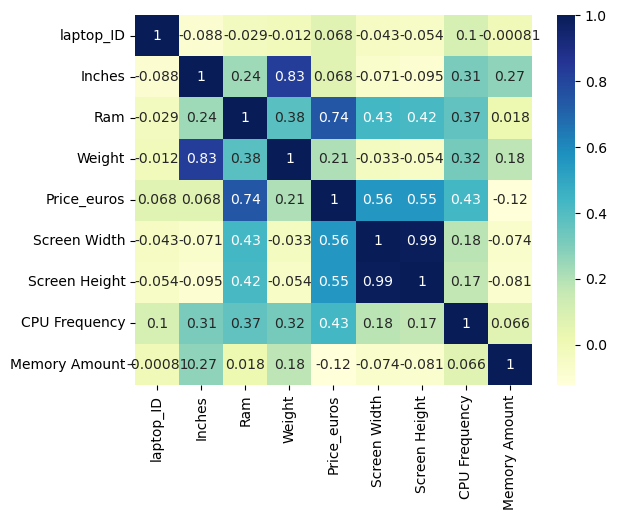

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu")
plt.show()


In [ ]:
target_correlations = correlation_matrix['Price_euros'].apply(abs).sort_values

In [ ]:
target_correlations

<bound method Series.sort_values of laptop_ID        0.067830
Inches           0.068197
Ram              0.743007
Weight           0.210370
Price_euros      1.000000
Screen Width     0.556529
Screen Height    0.552809
CPU Frequency    0.430293
Memory Amount    0.122365
Name: Price_euros, dtype: float64>

In [ ]:
# Select features based on correlation with target variable
selected_features = target_correlations().sort_values(ascending=False).head(21).index

In [ ]:
selected_features = list(selected_features)

In [ ]:
selected_features

['Price_euros',
 'Ram',
 'Screen Width',
 'Screen Height',
 'CPU Frequency',
 'Weight',
 'Memory Amount',
 'Inches',
 'laptop_ID']

In [ ]:
limited_df = df[selected_features]

In [ ]:
limited_df

,Price_euros,Ram,Screen Width,Screen Height,CPU Frequency,Weight,Memory Amount,Inches,laptop_ID
0,1339.69,8,2560,1600,2.3,1.37,128000.0,13.3,1
1,898.94,8,1440,900,1.8,1.34,128000.0,13.3,2
2,575.00,8,1920,1080,2.5,1.86,256000.0,15.6,3
3,2537.45,16,2880,1800,2.7,1.83,512000.0,15.4,4
4,1803.60,8,2560,1600,3.1,1.37,256000.0,13.3,5
...,...,...,...,...,...,...,...,...,...
1298,638.00,4,1920,1080,2.5,1.80,128000.0,14.0,1316
1299,1499.00,16,3200,1800,2.5,1.30,512000.0,13.3,1317
1300,229.00,2,1366,768,1.6,1.50,64000.0,14.0,1318
1301,764.00,6,1366,768,2.5,2.19,1000000.0,15.6,1319


<Axes: >

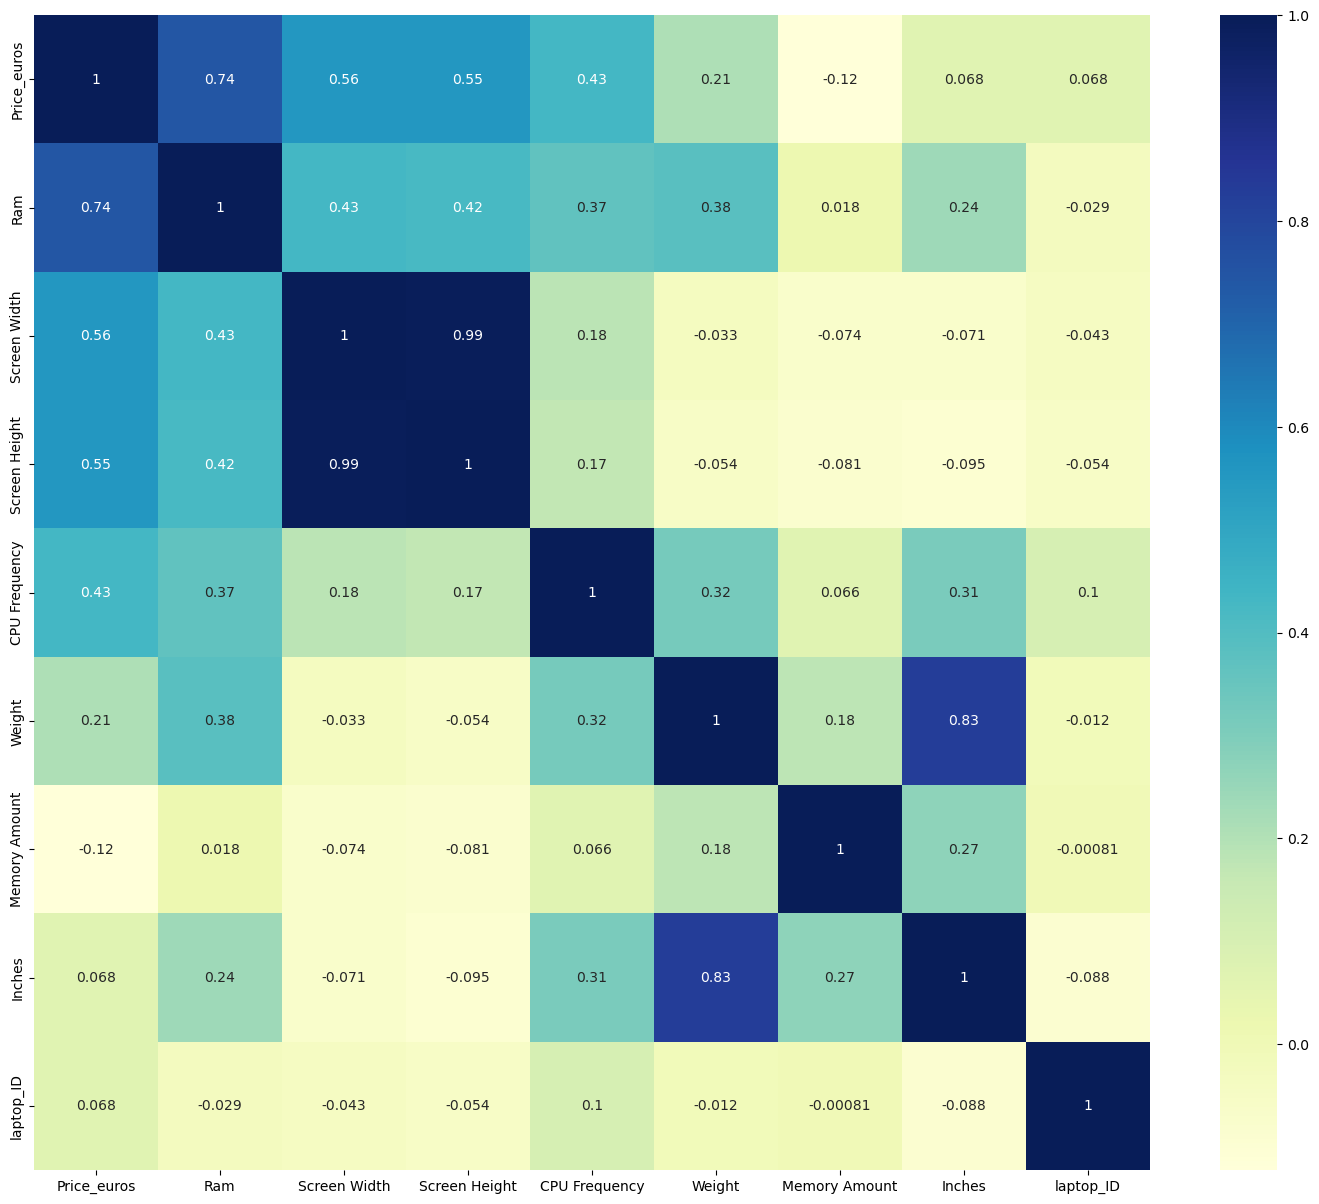

In [ ]:
# Ploting the correlation matrix for selected features
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

In [ ]:
#Model Training and evaluation

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X, y = limited_df.drop("Price_euros", axis=1), limited_df["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Standardize the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a Random Forest Regressor model

forest = RandomForestRegressor()
forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [ ]:
# Testing
forest.score(X_test_scaled, y_test)

0.7818609873622487

In [ ]:
# Predicting laptop prices and evaluate the model
y_pred = forest.predict(X_test_scaled)

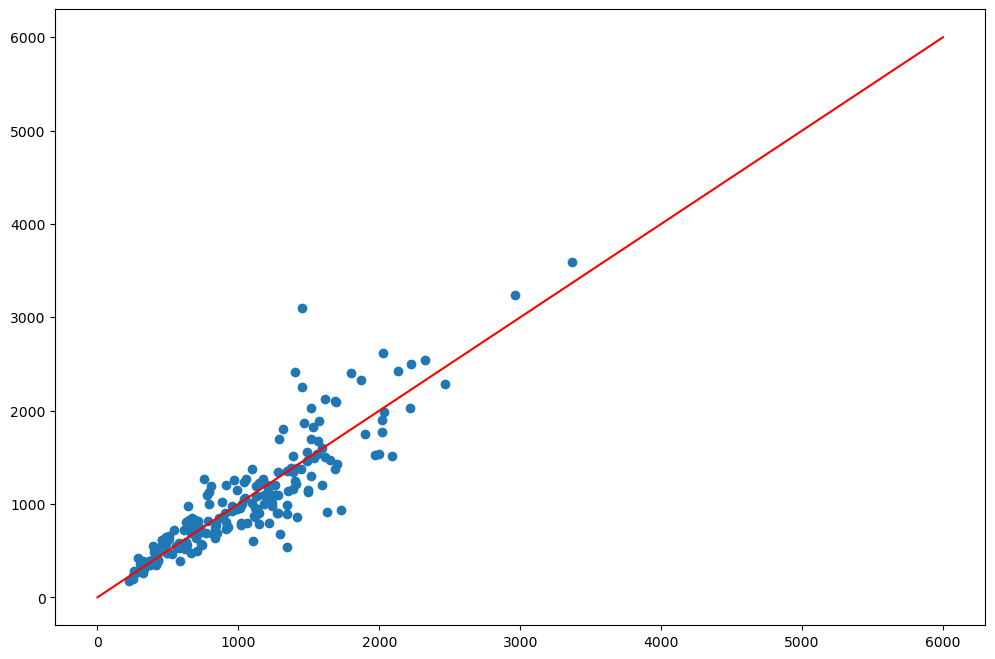

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), c="red")


In [ ]:
X_new_scaled = scaler.transform([X_test.iloc[0]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Predicting a laptop price
forest.predict(X_new_scaled)

array([255.4099])

In [ ]:
# Actual Price
y_test.iloc[0]

229.0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
import numpy as np
y_pred = model.predict(X_test)

# Compute the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Alternatively, you can compute R-squared (coefficient of determination)
r_squared = model.score(X_test, y_test)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (Coefficient of Determination):", r_squared)
accuracy = r_squared*100;
print("Accuracy : ",accuracy)


Mean Squared Error (MSE): 105665.87481300044
Root Mean Squared Error (RMSE): 325.06287824511804
R-squared (Coefficient of Determination): 0.7078004925116601
Accuracy :  70.780049251166


# Conclusion

In this project, we embarked on a journey to predict laptop prices using machine learning techniques.
Through exploration and analysis of the dataset, we uncovered valuable insights into the factors influencing laptop prices in today's market.



Our findings :

- CPU brand,
- screen resolution,
- memory size, and
- GPU type play significant roles in determining laptop prices.

These insights underscore the importance of considering multiple features when predicting laptop prices accurately.

We evaluated various algorithms and feature engineering techniques to optimize model performance.
Our models achieved a commendable level of accuracy, indicating their potential utility in real-world scenarios.



Limitations Faced :

- data quality issues,
- feature selection complexities, and
- computational constraints

that posed significant hurdles in model development.
Addressing these challenges required careful consideration and iterative refinement of our approach.

By leveraging machine learning techniques, we aim to empower consumers, manufacturers, and retailers with valuable insights to make informed decisions in the dynamic landscape of laptop pricing.

As we navigate the ever-evolving world of technology, our commitment to data-driven analysis remains steadfast. Together, we embark on a journey of discovery, innovation, and empowerment in the realm of laptop price prediction.



Future Directions (Work):

Integration of Additional Features:
 - Explore the inclusion of build quality, battery life, and brand reputation as supplementary features.

Ensemble Learning Techniques:
 - Investigate the potential of ensemble methods like random forests and gradient boosting to improve model performance.

Time-Series Analysis:
 - Incorporate historical pricing trends and market fluctuations through time-series modeling techniques.

Sentiment Analysis:
 - Analyze user reviews and feedback to gauge consumer perceptions and preferences regarding laptop features and brands.